<center>
<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
##  II Escuela de Verano en Física Computacional

Autor: Saneli Carbajal Vigo<br>
Institución: Pontificia Universidad Católica del Perú<br>
Correo: sanelicv@gmail.com<br>
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import files


## 1. Branching Ratios

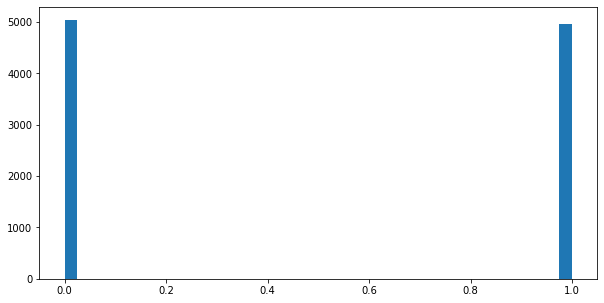

In [ ]:
nEvents = 10000
bins = 40
canal = np.random.randint(low=0, high=1+1, size=(nEvents,))
plt.figure(figsize=(10,5))
plt.hist(canal, bins)
plt.show()

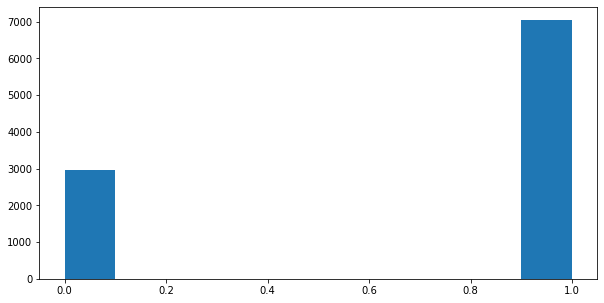

In [ ]:
nEvents = 10000
bins = 40
br1 = 0.3
br2 = 1 - br1
canal = np.random.choice([0, 1], p=[br1, br2], size=(nEvents,))
plt.figure(figsize=(10,5))
plt.hist(canal)
plt.show()

In [ ]:
nEvents = 10
br1 = 0.3
br2 = 1 - br1
for x in range(1, nEvents):
    canal = np.random.choice([0, 1], p=[br1, br2])
    if ( canal == 0):
        print ("canal 0")
    else:
        print ("canal 1")

canal 1
canal 1
canal 0
canal 1
canal 0
canal 1
canal 0
canal 0
canal 1


## 2. Cinemática del Decaimiento del pión en el SRCM

La cinemática del decaimiento del pión está regida por las leyes de la relatividad especial.
El cuadrimomento de una partícula se define (en unidades naturales) como:

$$p = (E, p_x, p_y, p_z) = (E,\mathbf{p})$$

Las componentes del cuadrimomento cumplen la relación on-shell:

$$E^2 = p^2 + m^2$$

Para una partícula en reposo (SRCM) se tiene

$$E=m$$

Analicemos el decaimiento a dos cuerpos de una partícula en reposo:
<center>
<img src="https://i.imgur.com/GrglbpG.png" width="300" align="center"/>
</center>

Por conservación de la energía:

\begin{align} E_1 + E_2 = E_a = m_a \end{align}

Por conservación del momento:
\begin{align} p_1 + p_2 = p_a = 0 &\Rightarrow p_1 = -p_2 \\
&\Rightarrow p_1^2 = p_2^2 \end{align}
Por la relación on shell de los cuadrivectores $p_1$ y $p_2$:
\begin{align} E_1^2 &= p_1^2 + m_1^2\\
E_2^2 &= p_2^2 + m_2^2\\ \hline
E_1^2 - E_2^2 &= m_1^2 + m_2^2 \\
\end{align}
Luego:
\begin{align}
(E_1 - E_2)(E_1 + E_2) &= m_1^2 + m_2^2 \\
E_1 - E_2 &= \frac{m_1^2 + m_2^2}{E_1 + E_2}\\
&= \frac{m_1^2 + m_2^2}{m_a} \\
\end{align}
Finalmente, de
\begin{align}
E_1 + E_2 &= m_a \\
E_1 - E_2 &= \frac{m_1^2 + m_2^2}{E_1 + E_2}
\end{align}
se obtiene
\begin{align}
E_1 &= \frac{m_a^2 + m_1^2 - m_2^2}{2m_a} \\
E_2 &= \frac{m_a^2 + m_2^2 - m_1^2}{2m_a}
\end{align}
Notamos que en el 2-body decay <b>las energías de las partículas finales son fijas</b>.

En el caso del decaimiento del pión, se tiene:

\begin{align}
m_\pi &= 139.570 \text{ MeV} \\
m_e &= 0.511 \text{ MeV} \\
m_{\nu_e} &= 0 \text{ MeV} \\
m_\mu &= 105.658 \text{ MeV} \\
m_{\nu_\mu} &= 0 \text{ MeV} \\
\end{align}

In [ ]:
# Almancenamos las masas esn GeV
pi_m = 139.570 * 1e-3
e_m = 0.511 * 1e-3
nue_m = 0 * 1e-3
mu_m = 105.658 * 1e-3
numu_m = 0 * 1e-3

# Derivamos las energias de los productos en el SRCM
e_E_CM = (pi_m**2 + e_m**2 - nue_m**2)/(2*pi_m)
nue_E_CM = (pi_m**2 + nue_m**2 - e_m**2 )/(2*pi_m)
mu_E_CM = (pi_m**2 + mu_m**2 - numu_m**2)/(2*pi_m)
numu_E_CM = (pi_m**2 + numu_m**2 - mu_m**2 )/(2*pi_m)

# Imprimimos
print ("e_E_CM:", e_E_CM*1e3, "MeV")
print ("nue_E_CM:", nue_E_CM*1e3, "MeV")
print ("mu_E_CM:", mu_E_CM*1e3, "MeV")
print ("numu_E_CM:", numu_E_CM*1e3, "MeV")

e_E_CM: 69.78593544816222 MeV
nue_E_CM: 69.78406455183779 MeV
mu_E_CM: 109.77788157913592 MeV
numu_E_CM: 29.79211842086408 MeV


Por lo tanto las energías en el decaimiento del pión en el SRCM son siempre:
<center>
<img src="https://i.imgur.com/s6qOSPe.png" width="600" align="center" />
</center>

En el SRCM, el decaimiento es isotrópico, es decir, no existe una dirección preferencial.<br>
Matemáticamente esto se interpreta como que los ángulos en coordenadas esféricas de las direcciones de los productos son totalmente aleatorios.
<center>
<img src="https://i.imgur.com/jiFCmGd.png" width="400" align="center" />
</center>

Existe sin embargo un constraint cinemático debido a que el momento total debe ser nulo en el SRCM.<br>
Por ejemplo, si el pión decae a través de su canal electrónico y el positrón tiene ángulos esféricos $\theta_e$ y $\phi_e$, los ángulos del neutrino deben cumplir la relación:
\begin{align}
\theta_{\nu_e} &= \pi - \theta_e \\
\phi_{\nu_e} &= 2\pi - \phi_e
\end{align}

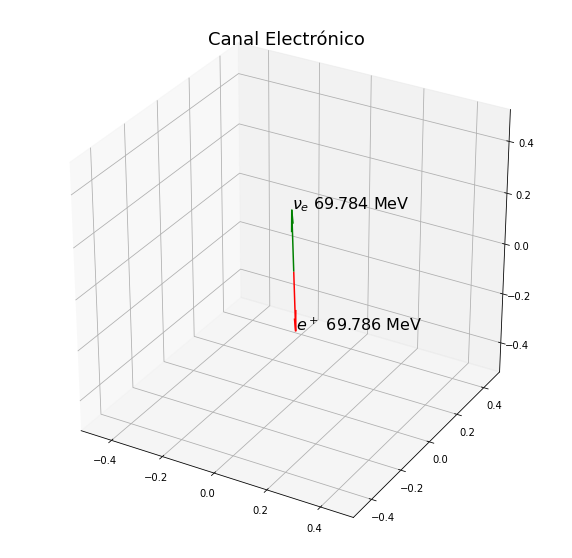

In [ ]:
nEvents = 1
br1 = 0.5
br2 = 1 - br1

fig = plt.figure()
axs = fig.gca(projection='3d')
lenght_factor = 4

for x in range(0, nEvents):
    
    prod1_theta = np.random.uniform(low=0, high=np.pi)    
    prod1_phi = np.random.uniform(low=0, high=2*np.pi)  
    prod1_n_CM = [np.sin(prod1_theta)*np.cos(prod1_phi), np.sin(prod1_theta)*np.sin(prod1_phi), np.cos(prod1_theta)]
    
    prod2_theta = np.pi - prod1_theta
    prod2_phi = prod1_phi + np.pi
    prod2_n_CM = [np.sin(prod2_theta)*np.cos(prod2_phi), np.sin(prod2_theta)*np.sin(prod2_phi), np.cos(prod2_theta)]
    
    canal = np.random.choice([0, 1], p=[br1, br2])
    if ( canal == 0):
        
        prod1_m = e_m
        prod1_E_CM = e_E_CM
        prod1_p_CM_mag = np.sqrt(prod1_E_CM**2 - prod1_m**2)        
        prod1_p_CM = prod1_p_CM_mag*np.array(prod1_n_CM)
        
        prod2_m = nue_m
        prod2_E_CM = nue_E_CM
        prod2_p_CM_mag = np.sqrt(prod2_E_CM**2 - prod2_m**2)
        prod2_p_CM = prod2_p_CM_mag*np.array(prod2_n_CM)
        
        axs.quiver(0, 0, 0, prod1_p_CM[0], prod1_p_CM[1], prod1_p_CM[2], length=lenght_factor, normalize=False, color="r")
        axs.quiver(0, 0, 0, prod2_p_CM[0], prod2_p_CM[1], prod2_p_CM[2], length=lenght_factor, normalize=False, color="g")
        
        axs.text(0+lenght_factor*prod1_p_CM[0], 0+lenght_factor*prod1_p_CM[1], 0+lenght_factor*prod1_p_CM[2], 
                 r"$e^+$ "+"{:.3f}".format(prod1_E_CM*1e3)+" MeV", color='black', fontsize=16)
        axs.text(0+lenght_factor*prod2_p_CM[0], 0+lenght_factor*prod2_p_CM[1], 0+lenght_factor*prod2_p_CM[2], 
                 r"$\nu_e$ "+"{:.3f}".format(prod2_E_CM*1e3)+" MeV", color='black', fontsize=16)
        
        axs.set_title(r"Canal Electrónico", fontsize=18)
        
    else:
        
        prod1_m = mu_m
        prod1_E_CM = mu_E_CM
        prod1_p_CM_mag = np.sqrt(prod1_E_CM**2 - prod1_m**2)        
        prod1_p_CM = prod1_p_CM_mag*np.array(prod1_n_CM)
        
        prod2_m = numu_m
        prod2_E_CM = numu_E_CM
        prod2_p_CM_mag = np.sqrt(prod2_E_CM**2 - prod2_m**2)
        prod2_p_CM = prod2_p_CM_mag*np.array(prod2_n_CM)
        
        axs.quiver(0, 0, 0, prod1_p_CM[0], prod1_p_CM[1], prod1_p_CM[2], length=lenght_factor, normalize=False, color="r")
        axs.quiver(0, 0, 0, prod2_p_CM[0], prod2_p_CM[1], prod2_p_CM[2], length=lenght_factor, normalize=False, color="g")
        
        axs.text(0+lenght_factor*prod1_p_CM[0], 0+lenght_factor*prod1_p_CM[1], 0+lenght_factor*prod1_p_CM[2], 
                 r"$\mu^+$ "+"{:.3f}".format(prod1_E_CM*1e3)+" MeV", color='black', fontsize=16)
        axs.text(0+lenght_factor*prod2_p_CM[0], 0+lenght_factor*prod2_p_CM[1], 0+lenght_factor*prod2_p_CM[2], 
                 r"$\nu_\mu$ "+"{:.3f}".format(prod2_E_CM*1e3)+" MeV", color='black', fontsize=16)
        
        axs.set_title(r"Canal Muónico", fontsize=18)

axs.set_xlim([-0.5, 0.5])
axs.set_ylim([-0.5, 0.5])
axs.set_zlim([-0.5, 0.5])

fig.set_figheight(10)
fig.set_figwidth(10)

## 3. Espectros en el Sistema de Referencia del Centro de Masa (SCRM)

In [ ]:
nEvents = 1000
br1 = 0.5
br2 = 1 - br1

# Arrays de energías
e_E = []
mu_E = []
nue_E = []
numu_E = []

# Generar energías
for x in range(1, nEvents):
    canal = np.random.choice([0, 1], p=[br1, br2])
    if ( canal == 0 ):
        e_E.append(e_E_CM)
        nue_E.append(nue_E_CM)
        #print ("canal 1")
    else:
        mu_E.append(mu_E_CM)
        numu_E.append(numu_E_CM)
        #print ("canal 2")
print ("Decays into electrons:",len(e_E))
print ("Decays into muons:",len(mu_E))

Decays into electrons: 504
Decays into muons: 495


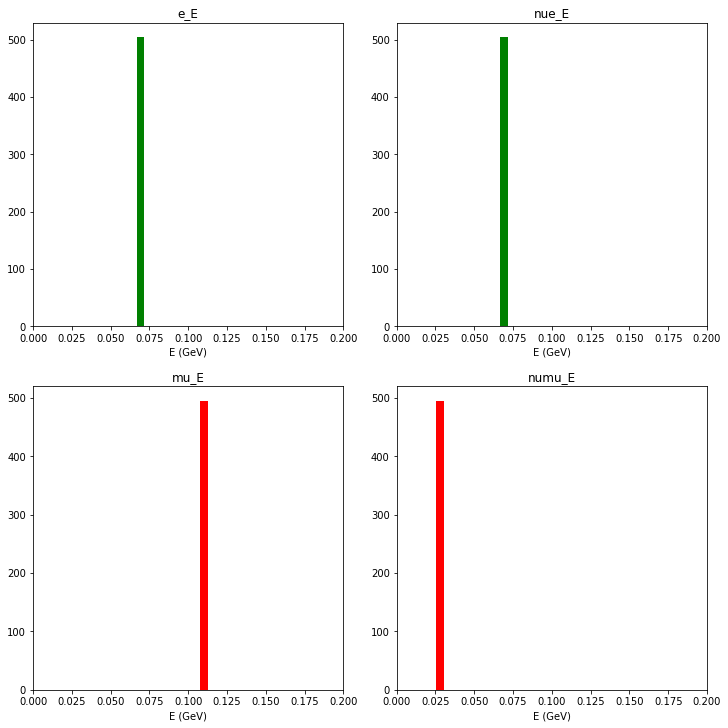

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True) #constrained_layout: ajustar automáticamente subplots

# extremos de los bins. 40 bins en el rango de 0 a 0.2 GeV
bins=np.linspace(0, 0.2, 40)

axs[0, 0].hist(e_E, bins, color="g")
axs[0, 0].set_title('e_E')

axs[0, 1].hist(nue_E, bins, color="g")
axs[0, 1].set_title('nue_E')

axs[1, 0].hist(mu_E, bins, color="r")
axs[1, 0].set_title('mu_E')

axs[1, 1].hist(numu_E, bins, color="r")
axs[1, 1].set_title('numu_E')

for ax in axs.flat:
    ax.set(xlabel='E (GeV)', ylabel='')
    ax.set_xlim([0, 0.2])
    
fig.set_figheight(10)
fig.set_figwidth(10)

## 4. Boost al Sistema de Referencia del Laboratorio (SRL)

En la realidad los piones no se producen en reposo. <br>
Los resultados obtenidos hasta ahora son válidos solo en el SRCM del pión.<br>
Por lo tanto, es necesario boostear los resultados obtenidos al Sistema de Referencia del Laboratorio.<br>

Sea $S'$ el SRCM de una partícula que se mueve con velocidad $v$ a lo largo del eje $Z$ y $S$ el sistema de referencia del Laboratorio.<br>
El boost de Lorentz del sistema S' al sistema S está dado por:

\begin{align}
E &= \gamma_v\left(E'+vp_z'\right)\\
p_x &= p_x'\\
p_y &= p_y'\\
p_z &= \gamma_v \left(p_z' + v E'\right),\\
\end{align}

donde $\gamma_v = 1/\sqrt{1-v^2}$.<br>
El boost se puede reescribir en forma vectorial como
\begin{align}
E &= \gamma_v \left( E' + \mathbf{v}\cdot\mathbf{p}' \right)\\
\mathbf{p}_\perp &= \mathbf{p_\perp}'\\
\mathbf{p}_{||} &= \gamma_v\left(\mathbf{p}_{||}' + \mathbf{v} E'\right)
\end{align}

Por otro lado, las componentes del momento en ambos sistemas de referencia se pueden escribir en función de la velocidad $\mathbf{v}$ como:

\begin{align}
\mathbf{p}_{||} &= \mathbf{\hat{v}} \left( \mathbf{p}\cdot \mathbf{\hat{v}}\right) = \frac{\mathbf{v}\left( \mathbf{p} \cdot \mathbf{v} \right)}{v^2}\\
\mathbf{p}_\perp &= \mathbf{p} - \mathbf{p}_{||} = \mathbf{p} - \frac{\mathbf{v}(\mathbf{p} \cdot \mathbf{v} )}{v^2}
\end{align}

Teniendo en cuenta que $\mathbf{p} = \mathbf{p}_\perp + \mathbf{p}_{||}$, el boost del SRCM al SRL se puede escribir como

\begin{align}
E &= \gamma_v \left( E' + \mathbf{v}\cdot\mathbf{p}' \right)\\
\mathbf{p} &= \mathbf{p}' + \frac{\mathbf{v}(\mathbf{p}' \cdot \mathbf{v} )\gamma_v^2}{\gamma_v+1} + \mathbf{v}\gamma_v E'
\end{align}

Por lo general en el SRL el eje Z se orienta de manera paralela al haz.<br>
En este sistema, los ángulosen coordenadas esféricas están definidos como

<center>
<img src="https://i.imgur.com/siXfiuQ.png" width="700" align="center" />
</center>

A partir de la energía $E$ del pión, su masa $m$ y los ángulos $\theta$ y $\phi$ es posible deducir sus variables cinemáticas relevantes:

\begin{align}
\gamma_v &= \frac{E}{m} \\
v &= \sqrt{1-\frac{1}{\gamma_v^2}} \\
\mathbf{v} &= \left(v\sin\theta\cos\phi, v\sin\theta\sin\phi, v\cos\theta\right)
\end{align}



In [ ]:
#Energía pión en SRL (en GeV)
pi_E = np.random.uniform(low=pi_m, high=20)

#Dirección theta del pión en SRL
pi_theta = np.random.uniform(low=0, high=np.pi)

#Dirección phi del pión en SRL
pi_phi = np.random.uniform(low=0, high=2*np.pi)

#Variables cinemáticas del pión
pi_gamma = pi_E/pi_m
pi_v_mag = np.sqrt(1-1/pi_gamma**2)
pi_v = np.array([pi_v_mag*np.sin(pi_theta)*np.cos(pi_phi), pi_v_mag*np.sin(pi_theta)*np.sin(pi_phi), pi_v_mag*np.cos(pi_theta)])

## Event Viewer

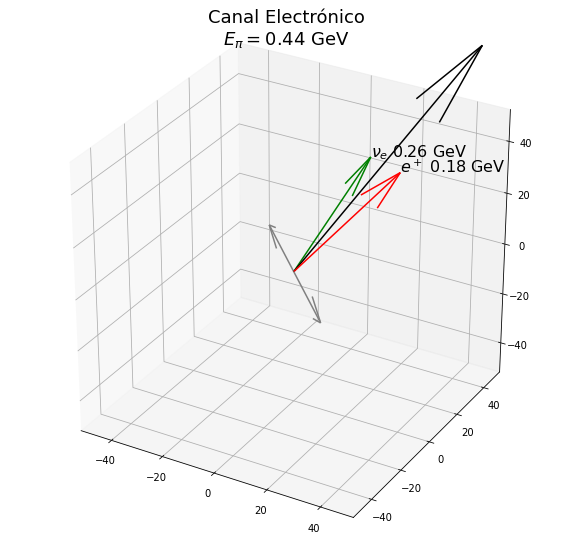

In [ ]:
fig = plt.figure()
axs = fig.gca(projection='3d')
lenght_factor = 50
e_high = 0.5 # en GeV

e_Energies = []
nue_Energies = []
mu_Energies = []
numu_Energies = []

nEvents = 1
br1 = 0.5
br2 = 1 - br1
for x in range(0, nEvents):
    
    #Variables del pion
    pi_E = np.random.uniform(low=pi_m, high=e_high)
    pi_theta = np.random.uniform(low=0, high=np.pi)
    pi_phi = np.random.uniform(low=0, high=2*np.pi)
    pi_gamma = pi_E/pi_m
    pi_v_mag = np.sqrt(1-1/pi_gamma**2)
    pi_v = np.array([pi_v_mag*np.sin(pi_theta)*np.cos(pi_phi), pi_v_mag*np.sin(pi_theta)*np.sin(pi_phi), pi_v_mag*np.cos(pi_theta)])
    pi_v_n = pi_v/pi_v_mag
    
    # Variables del Prod1 en SRCM
    prod1_theta = np.random.uniform(low=0, high=np.pi)
    prod1_phi = np.random.uniform(low=0, high=2*np.pi)  
    prod1_n_CM = [np.sin(prod1_theta)*np.cos(prod1_phi), np.sin(prod1_theta)*np.sin(prod1_phi), np.cos(prod1_theta)]
    
    # Variables del Prod2 en SRCM
    prod2_theta = np.pi - prod1_theta
    prod2_phi = prod1_phi + np.pi
    prod2_n_CM = [np.sin(prod2_theta)*np.cos(prod2_phi), np.sin(prod2_theta)*np.sin(prod2_phi), np.cos(prod2_theta)]
    
    canal = np.random.choice([0, 1], p=[br1, br2])

    if ( canal == 0):
        
        prod1_m = e_m
        prod1_E_CM = e_E_CM
        prod1_p_CM_mag = np.sqrt(prod1_E_CM**2 - prod1_m**2)        
        prod1_p_CM = prod1_p_CM_mag*np.array(prod1_n_CM)
        #prod1_n_CM = prod1_p_CM/prod1_p_CM_mag
        
        prod1_E = pi_gamma * ( prod1_E_CM + np.dot( pi_v, prod1_p_CM ) )
        prod1_p = prod1_p_CM + ( (pi_gamma**2)*(np.dot(prod1_p_CM, pi_v))*pi_v )/(pi_gamma**2+1) + pi_gamma*prod1_E_CM*pi_v
        prod1_p_mag = np.sqrt(np.dot(prod1_p, prod1_p))
        prod1_n = prod1_p/prod1_p_mag
        
        prod2_m = nue_m
        prod2_E_CM = nue_E_CM
        prod2_p_CM_mag = np.sqrt(prod2_E_CM**2 - prod2_m**2)
        prod2_p_CM = prod2_p_CM_mag*np.array(prod2_n_CM)
        #prod2_n_CM = prod2_p_CM/prod2_p_CM_mag
        
        prod2_E = pi_gamma * ( prod2_E_CM + np.dot( pi_v, prod2_p_CM ) )
        prod2_p = prod2_p_CM + ( (pi_gamma**2)*(np.dot(prod2_p_CM, pi_v))*pi_v )/(pi_gamma**2+1) + pi_gamma*prod2_E_CM*pi_v
        prod2_p_mag = np.sqrt(np.dot(prod2_p, prod2_p))
        prod2_n = prod2_p/prod2_p_mag
        
        axs.quiver(0, 0, 0, prod1_n[0], prod1_n[1], prod1_n[2], 
                   length=lenght_factor, normalize=False, color="r")
        axs.quiver(0, 0, 0, prod2_n[0], prod2_n[1], prod2_n[2], 
                   length=lenght_factor, normalize=False, color="g")
        
        axs.quiver(0, 0, 0, prod1_n_CM[0], prod1_n_CM[1], prod1_n_CM[2], 
                   length=lenght_factor, normalize=False, color="gray")
        axs.quiver(0, 0, 0, prod2_n_CM[0], prod2_n_CM[1], prod2_n_CM[2], 
                   length=lenght_factor, normalize=False, color="gray")
        
        axs.quiver(0, 0, 0, pi_v_n[0], pi_v_n[1], pi_v_n[2], 
                   length=2*lenght_factor, normalize=False, color="black")
        
        axs.text(0+lenght_factor*prod1_n[0], 0+lenght_factor*prod1_n[1], 0+lenght_factor*prod1_n[2], 
                 r"$e^+$ "+"{:.2f}".format(prod1_E)+" GeV", color='black', fontsize=16)
        axs.text(0+lenght_factor*prod2_n[0], 0+lenght_factor*prod2_n[1], 0+lenght_factor*prod2_n[2], 
                 r"$\nu_e$ "+"{:.2f}".format(prod2_E)+" GeV", color='black', fontsize=16)
        
        axs.set_title("Canal Electrónico\n"+r"$E_\pi = $"+"{:.2f}".format(pi_E)+" GeV", fontsize=18)
        
    else:
        
        prod1_m = mu_m
        prod1_E_CM = mu_E_CM
        prod1_p_CM_mag = np.sqrt(prod1_E_CM**2 - prod1_m**2)        
        prod1_p_CM = prod1_p_CM_mag*np.array(prod1_n_CM)
        #prod1_n_CM = prod1_p_CM/prod1_p_CM_mag
        
        prod1_E = pi_gamma * ( prod1_E_CM + np.dot( pi_v, prod1_p_CM ) )
        prod1_p = prod1_p_CM + ( (pi_gamma**2)*(np.dot(prod1_p_CM, pi_v))*pi_v )/(pi_gamma**2+1) + pi_gamma*prod1_E_CM*pi_v
        prod1_p_mag = np.sqrt(np.dot(prod1_p, prod1_p))
        prod1_n = prod1_p/prod1_p_mag
        
        prod2_m = numu_m
        prod2_E_CM = numu_E_CM
        prod2_p_CM_mag = np.sqrt(prod2_E_CM**2 - prod2_m**2)
        prod2_p_CM = prod2_p_CM_mag*np.array(prod2_n_CM) 
        #prod2_n_CM = prod2_p_CM/prod2_p_CM_mag
        
        prod2_E = pi_gamma * ( prod2_E_CM + np.dot( pi_v, prod2_p_CM ) )
        prod2_p = prod2_p_CM + ( (pi_gamma**2)*(np.dot(prod2_p_CM, pi_v))*pi_v )/(pi_gamma**2+1) + pi_gamma*prod2_E_CM*pi_v
        prod2_p_mag = np.sqrt(np.dot(prod2_p, prod2_p))
        prod2_n = prod2_p/prod2_p_mag
        
        axs.quiver(0, 0, 0, prod1_n[0], prod1_n[1], prod1_n[2], 
                   length=lenght_factor, normalize=False, color="r")
        axs.quiver(0, 0, 0, prod2_n[0], prod2_n[1], prod2_n[2], 
                   length=lenght_factor, normalize=False, color="g")
        
        axs.quiver(0, 0, 0, prod1_n_CM[0], prod1_n_CM[1], prod1_n_CM[2], 
                   length=lenght_factor, normalize=False, color="gray")
        axs.quiver(0, 0, 0, prod2_n_CM[0], prod2_n_CM[1], prod2_n_CM[2], 
                   length=lenght_factor, normalize=False, color="gray")
        
        axs.quiver(0, 0, 0, pi_v_n[0], pi_v_n[1], pi_v_n[2], 
                   length=2*lenght_factor, normalize=False, color="black")        
        
        axs.text(0+lenght_factor*prod1_n[0], 0+lenght_factor*prod1_n[1], 0+lenght_factor*prod1_n[2], 
                 r"$\mu^+$ "+"{:.2f}".format(prod1_E)+" GeV", color='black', fontsize=16)
        axs.text(0+lenght_factor*prod2_n[0], 0+lenght_factor*prod2_n[1], 0+lenght_factor*prod2_n[2], 
                 r"$\nu_\mu$ "+"{:.2f}".format(prod2_E)+" GeV", color='black', fontsize=16)
        
        axs.set_title("Canal Muónico\n"+r"$E_\pi = $"+"{:.2f}".format(pi_E)+" GeV", fontsize=18)

axslimits = 50
axs.set_xlim([-axslimits, axslimits])
axs.set_ylim([-axslimits, axslimits])
axs.set_zlim([-axslimits, axslimits])

fig.set_figheight(10)
fig.set_figwidth(10)

## 5. Espectros energéticos de data de PYTHIA8

Para esta sección necesitaremos utilizar un archivo con data de piones que ha sido producido con el paquete PYTHIA8 simulando colisiones de protones de 120GeV de energía sobre un target de grafito.<br>
Se puede descargar del siguiente link:<br>
[Dar clic derecho aquí y elegir "Guardar Enlace como..."](https://raw.githubusercontent.com/scarbajalv/3o4cosas/master/data/120GeV-100k.csv?token=ALOEEO7E3FR2YLWRPH7G6OLAMAWTY)<br>
Si todo sale bien deberian descargar el archivo <b>120GeV-100k.txt</b>

In [ ]:
# Subimos el archivo que vamos a usar: 120GeV-100k.txt
uploaded = files.upload()

Saving 120GeV-100k.txt to 120GeV-100k (1).txt


In [ ]:
# Convertimos nuestra data en un dataframe y luego en una lista para su posterior uso
dataframe = pd.read_csv(io.StringIO(uploaded['120GeV-100k.txt'].decode('utf-8')), sep=',')
dataset = dataframe.values.tolist()
# Separamos la data
data_n = len(dataset)
data_E_pi = [dataset[i][0] for i in range(0, data_n)]
data_theta_pi = [dataset[i][1] for i in range(0, data_n)]
data_phi_pi = [dataset[i][2] for i in range(0, data_n)]
print (data_n, "Eventos")

278041 Eventos


In [ ]:
# PARÁMETROS IMPORTANTES
nEvents = 100000
br1 = 0.5
br2 = 1 - br1

# DEFINIMOS ARREGLOS
prod1_Energies = []
prod2_Energies = []

prod1_nVector = []
prod2_nVector = []

decay_type =  []


for i in range(0, nEvents):
    
    if (i > data_n):
        break
    
    #Variables del pion
    pi_E = data_E_pi[i]
    pi_theta = data_theta_pi[i]
    pi_phi = data_phi_pi[i]
    pi_gamma = pi_E/pi_m
    pi_v_mag = np.sqrt(1-1/pi_gamma**2)
    pi_v = np.array([pi_v_mag*np.sin(pi_theta)*np.cos(pi_phi), pi_v_mag*np.sin(pi_theta)*np.sin(pi_phi), pi_v_mag*np.cos(pi_theta)])
    
    # Variables del Prod1 en SRCM
    prod1_theta = np.random.uniform(low=0, high=np.pi)
    prod1_phi = np.random.uniform(low=0, high=2*np.pi)  
    prod1_n_CM = [np.sin(prod1_theta)*np.cos(prod1_phi), np.sin(prod1_theta)*np.sin(prod1_phi), np.cos(prod1_theta)]
    
    # Variables del Prod2 en SRCM
    prod2_theta = np.pi - prod1_theta
    prod2_phi = prod1_phi + np.pi
    prod2_n_CM = [np.sin(prod2_theta)*np.cos(prod2_phi), np.sin(prod2_theta)*np.sin(prod2_phi), np.cos(prod2_theta)]
    
    canal = np.random.choice([0, 1], p=[br1, br2])
    if ( canal == 0 ):
        
        prod1_m = e_m
        prod1_E_CM = e_E_CM
        prod1_p_CM_mag = np.sqrt(prod1_E_CM**2 - prod1_m**2)        
        prod1_p_CM = prod1_p_CM_mag*np.array(prod1_n_CM)
        
        prod1_E = pi_gamma * ( prod1_E_CM + np.dot( pi_v, prod1_p_CM ) )
        prod1_p = prod1_p_CM + ( (pi_gamma**2)*(np.dot(prod1_p_CM, pi_v))*pi_v )/(pi_gamma**2+1) + pi_gamma*prod1_E_CM*pi_v
        prod1_p_mag = np.sqrt(np.dot(prod1_p, prod1_p))
        prod1_n = prod1_p/prod1_p_mag
        
        prod2_m = nue_m
        prod2_E_CM = nue_E_CM
        prod2_p_CM_mag = np.sqrt(prod2_E_CM**2 - prod2_m**2)
        prod2_p_CM = prod2_p_CM_mag*np.array(prod2_n_CM)
        
        prod2_E = pi_gamma * ( prod2_E_CM + np.dot( pi_v, prod2_p_CM ) )
        prod2_p = prod2_p_CM + ( (pi_gamma**2)*(np.dot(prod2_p_CM, pi_v))*pi_v )/(pi_gamma**2+1) + pi_gamma*prod2_E_CM*pi_v
        prod2_p_mag = np.sqrt(np.dot(prod2_p, prod2_p))
        prod2_n = prod2_p/prod2_p_mag
        
        prod1_Energies.append(prod1_E)
        prod1_nVector.append(prod1_n)
        prod2_Energies.append(prod2_E)
        prod2_nVector.append(prod2_n)
        decay_type.append(canal)
        
        
    else:
        
        prod1_m = mu_m
        prod1_E_CM = mu_E_CM
        prod1_p_CM_mag = np.sqrt(prod1_E_CM**2 - prod1_m**2)        
        prod1_p_CM = prod1_p_CM_mag*np.array(prod1_n_CM)
        
        prod1_E = pi_gamma * ( prod1_E_CM + np.dot( pi_v, prod1_p_CM ) )
        prod1_p = prod1_p_CM + ( (pi_gamma**2)*(np.dot(prod1_p_CM, pi_v))*pi_v )/(pi_gamma**2+1) + pi_gamma*prod1_E_CM*pi_v
        prod1_p_mag = np.sqrt(np.dot(prod1_p, prod1_p))
        prod1_n = prod1_p/prod1_p_mag
        
        prod2_m = numu_m
        prod2_E_CM = numu_E_CM
        prod2_p_CM_mag = np.sqrt(prod2_E_CM**2 - prod2_m**2)
        prod2_p_CM = prod2_p_CM_mag*np.array(prod2_n_CM)        
        
        prod2_E = pi_gamma * ( prod2_E_CM + np.dot( pi_v, prod2_p_CM ) )
        prod2_p = prod2_p_CM + ( (pi_gamma**2)*(np.dot(prod2_p_CM, pi_v))*pi_v )/(pi_gamma**2+1) + pi_gamma*prod2_E_CM*pi_v
        prod2_p_mag = np.sqrt(np.dot(prod2_p, prod2_p))
        prod2_n = prod2_p/prod2_p_mag
        
        prod1_Energies.append(prod1_E)
        prod1_nVector.append(prod1_n)
        prod2_Energies.append(prod2_E)
        prod2_nVector.append(prod2_n)
        decay_type.append(canal)


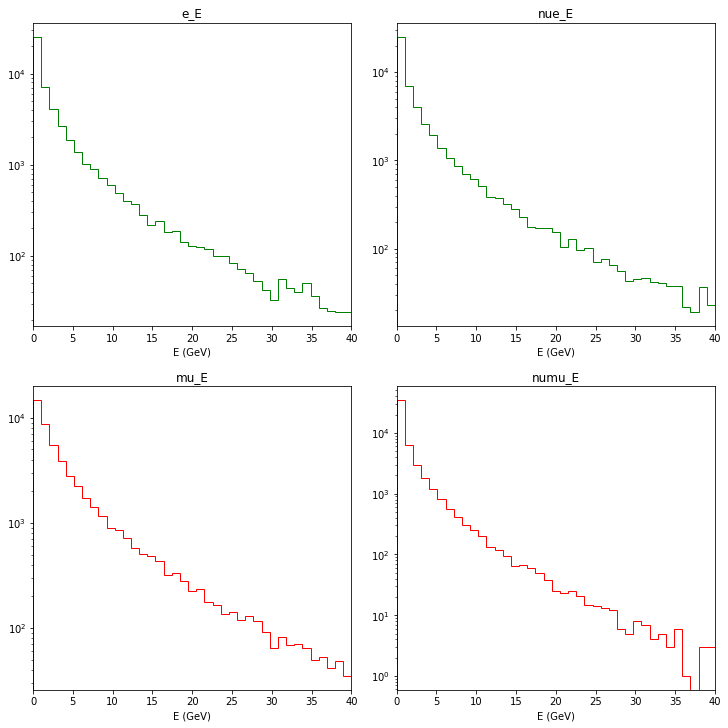

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True, facecolor = "white") #constrained_layout: ajustar automáticamente subplots

# extremos de los bins. 40 bins en el rango de 0 a 0.2 GeV
nbins = 40
densityBool = False

e_Energies = []
nue_Energies = []
mu_Energies = []
numu_Energies = []

for i in range(0, nEvents):
    if (decay_type[i] == 0):
        e_Energies.append(prod1_Energies[i])
        nue_Energies.append(prod2_Energies[i])
    else:
        mu_Energies.append(prod1_Energies[i])
        numu_Energies.append(prod2_Energies[i])

Emin = 0
Emax = 40
bins=np.linspace(Emin, Emax, nbins)
axs[0, 0].hist(e_Energies, bins, color="g", histtype='step', density=densityBool)
axs[0, 0].set_title('e_E')
axs[0, 0].set_xlim([Emin, Emax])

Emin = 0
Emax = 40
bins=np.linspace(Emin, Emax, nbins)
axs[0, 1].hist(nue_Energies, bins, color="g", histtype='step', density=densityBool)
axs[0, 1].set_title('nue_E')
axs[0, 1].set_xlim([Emin, Emax])

Emin = 0
Emax = 40
bins=np.linspace(Emin, Emax, nbins)
axs[1, 0].hist(mu_Energies, bins, color="r", histtype='step', density=densityBool)
axs[1, 0].set_title('mu_E')
axs[1, 0].set_xlim([Emin, Emax])

Emin = 0
Emax = 40
bins=np.linspace(Emin, Emax, nbins)
axs[1, 1].hist(numu_Energies, bins, color="r", histtype='step', density=densityBool)
axs[1, 1].set_title('numu_E')
axs[1, 1].set_xlim([Emin, Emax])

for ax in axs.flat:
    ax.set(xlabel='E (GeV)', ylabel='')
    ax.set_yscale('log')
    
fig.set_figheight(10)
fig.set_figwidth(10)

## 6. Distancia recorrida por el Pión*

Luego de su producción, el pión se propaga una distancia $d$ antes de desintegrarse.<br>
Esta distancia depende de su energía $(E_\pi)$ y de su tiempo de vida media propio $(\tau_0)$.

Luego de ser producido, la probabilidad de que un pión en reposo decaiga en un tiempo t se modela a través de una distribución de probabilidad de la forma

\begin{align}
PDF(t) = \frac{1}{\tau_0}e^{-\frac{t}{\tau_0}},
\end{align}

donde $\tau_0 = 2.6\times10^{-8}s$ es el tiempo de vida media propio del pión.<br>
La distribución de probabilidad satisface la relación
\begin{align}
\int_0^\infty PDF(t) = \int_0^\infty \frac{1}{\tau_0}e^{-\frac{t}{\tau_0}} = 1,
\end{align}
lo cual asegura que, dado un tiempo suficientemente grande, el pión necesariamente decae. <br>
Por otro lado, la probabilidad de que el pión decaiga en el invervalo $\left< 0, t\right>$ se conoce como Función de Distribución Acumulada (CDF)
\begin{align}
CDF(t) = \int_0^t \frac{1}{\tau_0}e^{-\frac{t}{\tau_0}} = 1 - e^{-\frac{t}{\tau_0}}.
\end{align}
Notamos que $CDF(0) = 0$, lo cual significa que el pión no decae en cuanto es creado, y además que $CDF(\infty)=1$, lo cual significa que el pión necesariamente decae dado un tiempo lo suficientemente grande.<br>
Para poder generar distancias de decaimiento aleatorias para los piones, primero es necesario generar tiempos de decaimiento aleatorios que obedezcan las distribuciones de probabilidad antes mencionadas. Esto se puede lograr rápidamente en este caso.<br>
En primer lugar invertimos la CDF:
\begin{align}
y &= 1 - e^{-\frac{t}{\tau_0}} \\
\Rightarrow t &= \tau_0 \ln\left(\frac{1}{1-y}\right).
\end{align}
Y a continuación, los tiempos aleatorios que buscamos los obtenemos generando valores aleatorios para $y$ en el intervalo $\left< 0, 1\right>$ y reemplazandolos en la última ecuación.

En el caso de un pión relativista que se propaga con rapidez $v$, es necesario tener en cuenta el fenómeno de dilatación temporal. En la práctica, esto se logra utilizando un tiempo de vida media dilatado:
\begin{align}
\tau = \gamma_v \tau_0
\end{align}

De esta forma, las distancias de decaimiento aleatorias que buscamos se pueden obtener reemplazando números aleatorios $y\in \left<0,1\right>$ en la expresión:
\begin{align}
d &= v \times (3\times10^8) \times \gamma_v\tau_0 \ln\left(\frac{1}{1-y}\right).
\end{align}

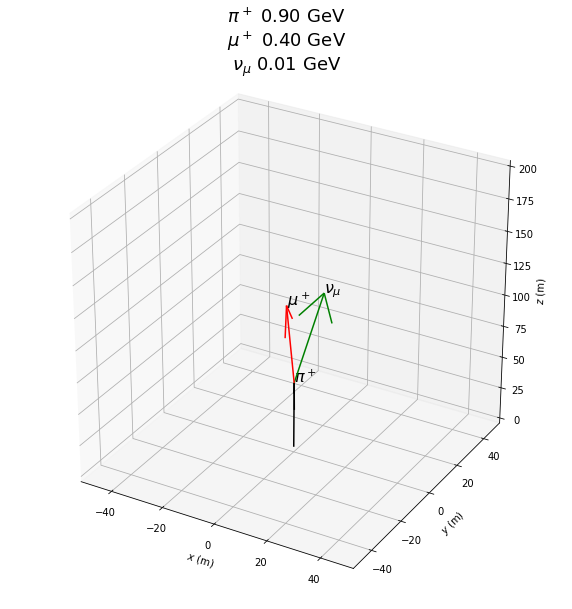

In [ ]:
#Lifetime del pion
pi_tau0 = 2.6e-8

fig = plt.figure()
axs = fig.gca(projection='3d')
lenght_factor = 75

# Tomamos un pion
i = np.random.randint(low=0, high=nEvents)

# Variables del pion
pi_E = data_E_pi[i]
pi_theta = data_theta_pi[i]
pi_phi = data_phi_pi[i]
pi_gamma = pi_E/pi_m
pi_v_mag = np.sqrt(1-1/pi_gamma**2)
pi_v = np.array([pi_v_mag*np.sin(pi_theta)*np.cos(pi_phi), pi_v_mag*np.sin(pi_theta)*np.sin(pi_phi), pi_v_mag*np.cos(pi_theta)])
pi_v_n = pi_v/pi_v_mag

#Generamos una distancia aleatoria para el pión
d = pi_v_mag * (3*10**8) * pi_gamma * pi_tau0 * np.log(1/(1-np.random.uniform()))

# Dibujamos flechas para cada partícula
axs.quiver(0, 0, 0, d*pi_v_n[0], d*pi_v_n[1], d*pi_v_n[2], 
           length=1, normalize=False, color="black")

axs.quiver(d*pi_v_n[0], d*pi_v_n[1], d*pi_v_n[2], prod1_nVector[i][0], prod1_nVector[i][1], prod1_nVector[i][2], 
           length=lenght_factor, normalize=False, color="r")

axs.quiver(d*pi_v_n[0], d*pi_v_n[1], d*pi_v_n[2], prod2_nVector[i][0], prod2_nVector[i][1], prod2_nVector[i][2], 
           length=lenght_factor, normalize=False, color="g")

# Definimos algunos strings
names = [[r"$e^+$", r"$\nu_e$"], [r"$\mu^+$", r"$\nu_\mu$"], [r"$\pi^+$"]]
textEnergies = [ [r"$e^+$ "+"{:.2f}".format(prod1_E)+" GeV\n", r"$\nu_e$ "+"{:.2f}".format(prod2_E)+" GeV\n"], 
                 [r"$\mu^+$ "+"{:.2f}".format(prod1_E)+" GeV\n", r"$\nu_\mu$ "+"{:.2f}".format(prod2_E)+" GeV\n" ], 
                 [r"$\pi^+$ "+"{:.2f}".format(pi_E)+" GeV\n"] ]

# Añadimos nombres a las flechas
axs.text(0+d*pi_v_n[0], 0+d*pi_v_n[1], 0+d*pi_v_n[2], 
         names[2][0], color='black', fontsize=16)
axs.text(d*pi_v_n[0]+lenght_factor*prod1_nVector[i][0], d*pi_v_n[1]+lenght_factor*prod1_nVector[i][1], d*pi_v_n[2]+lenght_factor*prod1_nVector[i][2], 
         names[decay_type[i]][0], color='black', fontsize=16)
axs.text(d*pi_v_n[0]+lenght_factor*prod2_nVector[i][0], d*pi_v_n[1]+lenght_factor*prod2_nVector[i][1], d*pi_v_n[2]+lenght_factor*prod2_nVector[i][2], 
         names[decay_type[i]][1], color='black', fontsize=16)

axslimitsX = 50
axslimitsY = 50
axslimitsZ = 200
axs.set_xlim([-axslimitsX, axslimitsX])
axs.set_ylim([-axslimitsY, axslimitsY])
axs.set_zlim([0, axslimitsZ])

axs.set_xlabel("$x$ (m)")
axs.set_ylabel("$y$ (m)")
axs.set_zlabel("$z$ (m)")

# Ajustamos el título para mostrar energías
axs.set_title(textEnergies[2][0]+textEnergies[decay_type[i]][0]+textEnergies[decay_type[i]][1], fontsize=18)

fig.set_figheight(10)
fig.set_figwidth(10)

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>